### Sentiment Analysis using TextBlob:

We basically will be using libraries like TextBlob and Tweepy in order to proceed in our project.The fisrt setp of this will be the connection to the Twitter.
The twitter API will help us to establish the connection and play around with the tweets afterwards.

In [3]:
from textblob import TextBlob
import sys,tweepy
import matplotlib.pyplot as plt
import my_credentials as cred

This method will basically calulate the percentage of a certain number of tweets out of total number of tweets.

In [4]:
def prcentage(a,b):
    return 100*float(a)/float(b)

Below mentioned piece of code will help us to establish the connection between our code and twitter by setting up the corresponding Consumer key and and Access Key. We need to set up the details on https://developer.twitter.com/.

To get the requisite details, we have request for a Tweeter Developer account and once we get that we will have the access to our Access Keys. I have saved the details in a file called *my_credentials* and then imported.

In [37]:
auth = tweepy.OAuthHandler(cred.ConsumerKey,cred.ConsumerToken)
auth.set_access_token(cred.AccessToken,cred.AccessTokenSecret)

API function of tweepy Library helps us to connect with the Tweeter system.

In [38]:
API = tweepy.API(auth)

In [46]:
SearchWord = input("Enter the Key word to Search:")
NOfSearch = int(input('Enter the number of searches you want to make:'))
tweets  = tweepy.Cursor(API.search,q=SearchWord).items(NOfSearch)

Enter the Key word to Search:Economy
Enter the number of searches you want to make:100


In [47]:
neutral = 0
negative=0
positive = 0

for tweet in tweets:
    print(tweet.text)
    
    analysis = TextBlob(tweet.text)
    
    print(analysis.sentiment.polarity)
    if (analysis.sentiment.polarity==0):
        neutral+=1
    elif (analysis.sentiment.polarity<0):
        negative += 1
    elif (analysis.sentiment.polarity>0):
        positive += 1

number = [positive,neutral,negative]
positive_p = prcentage(positive,NOfSearch) 
neutral_p = prcentage(neutral,NOfSearch)
negative_p = prcentage(negative,NOfSearch) 

sentiments = [positive_p,neutral_p,negative_p]
print(positive_p,' ',neutral_p,' ',negative_p)

RT @GracieNunyabiz: MSM covered the Impeachment for over 800 minutes, while covering the #Economy - which actually affects our everyday liv…
-0.1
RT @ssastronaut: Reminder no.627 Hon.@PiyushGoyal
sir,#Aurangabad urgently needs new pit line,ur decision hampering our economy.
Kindlyperm…
0.13636363636363635
RT @Sankei_news: ロッテ創業者、重光武雄氏　日韓両国で足跡　愛されるブランド
https://t.co/4teqnnsQcn

重光氏が日本に渡航したのは１９４２年。戦後に進駐軍が米国から持ち込んだチューインガムを見てガムの製造を思いつき、４８年にロッテを設立。…
0.0
RT @DineshDSouza: Two key predictions made by the Democratic Left: 1. The economy would crumble under Trump 2. Trump would govern as a dict…
0.0
RT @Paola_Dec1231: In perfect Italian, he schools left-wing journalists; leaves them speechless.

He explains that his parents migrated dur…
0.5
RT @wordamentalist: Westminster have mismanaged Scotland’s economy to the point of a 7% deficit. If a future Scottish Government had full c…
0.175
Receita recupera R$ 5,2 bilhões em dívidas de empresas com o Simples https://t.co/oxSjzsyFJo https://t.co/G0ZT6

@Minka51150356 @JonesysHeart @Jules66968941 @Sun_Child223 @IlhanMN Oh well if Fox "news" says so it must be true...… https://t.co/3c19uR16AC
0.0
RT @noturtrash: Its unfair to expect that a guy in his late 20s or even 30s is going to give you the luxurious life your father was able to…
-0.10000000000000002
RT @DineshDSouza: Two key predictions made by the Democratic Left: 1. The economy would crumble under Trump 2. Trump would govern as a dict…
0.0
RT @MollyJongFast: I don’t know who needs to hear this but impeachment has nothing to do with the economy. https://t.co/nw93Tq0Sro
0.0
Currently editing a book which presents an interesting idea for a resource based economy.
#editing #books #proofreading #booklover
0.25
RT @adam_tooze: In 2019 world trade shrank. This is a rare occurrence. Last time was 2008-9. For @nytimes I put together some thoughts on h…
0.15
RT @DineshDSouza: Two key predictions made by the Democratic Left: 1. The economy would crumble under Trump 2. Trump would govern a

Text(0.5, 0.98, 'Showing the sentiment based on the last 100 Tweets')

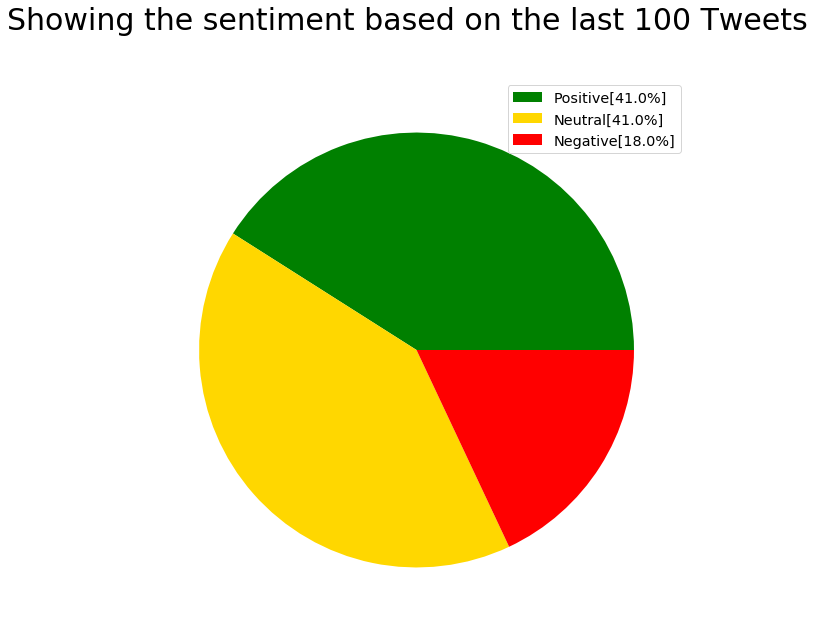

In [48]:
labels=['Positive['+ str(positive_p) +'%]','Neutral['+ str(neutral_p) +'%]','Negative['+ str(negative_p) +'%]']
colors = ['green','gold','red']
plt.figure(figsize=(10,10))
a,text = plt.pie(sentiments,colors=colors)
plt.legend(a,labels,fontsize="x-large")
plt.suptitle('Showing the sentiment based on the last'+ ' '+ str(NOfSearch) + ' Tweets',fontsize=30)